<a href="https://colab.research.google.com/github/sahin88/Keras_Learning_Meterial_and_Basic_Applications/blob/main/NeuralNetworkScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network  from Scratch

### Read Data Fram DataBase

In [327]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import random 
df=pd.read_csv('/content/home_price.csv')

X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=25)

### Data Normalization

In [328]:
X_train.shape
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

### Define model as class

In [341]:

class myNeuralNetwork:
    def __init__(self):
        self.w1 = 1 
        self.w2 = 1
        self.bias = 0
        self.result={'loss':[],'bias':[],'weight1':[],'weight2':[]}

    def sigmoid_numpy(self,X):
      return 1/(1+np.exp(-X))

    def normalize_tensor(self,vector):
      const=1e-15
      return np.array([vec-const if vec==1 else const-vec if vec==0 else vec for vec in vector])
  
    def binary_cross_entropy(self,y_out,y_pred):
      y_out=self.normalize_tensor(y_out)
      y_pred=self.normalize_tensor(y_pred)
      return -np.mean(y_out*np.log(y_pred)+(1-y_out)*np.log(1-y_pred))
        
    def fit(self, X, y, epochs, loss_thresold):
        self.w1, self.w2, self.bias = self.gradient_descent(X['age'],X['affordibility'],y, epochs, loss_thresold)
        print(f"Final weights and bias: w1: {self.w1}, w2: {self.w2}, bias: {self.bias}")
        
    def predict(self, X_test):
        weighted_sum = self.w1*X_test['age'] + self.w2*X_test['affordibility'] + self.bias
        return self.sigmoid_numpy(weighted_sum)
    def plot_grap(self):
      result_keys_list=list(self.result.keys())
      for i in range(4):
        color_list=['blue','green','red','cyan','magenta','orchid','purple','peru']
        random_nr=random.randint(0,len(color_list)-1)
        plt.figure(figsize=(8, 6), dpi=80)
        plt.plot(self.result[result_keys_list[i]], linewidth='2.5',color=color_list[random_nr])
        plt.grid(True)
        plt.title(result_keys_list[i])
        plt.xlabel('Epochs')
        plt.ylabel(result_keys_list[i])
        plt.show()


    def gradient_descent(self, age,affordability, y_true, epochs, loss_thresold):
        w1 = w2 = 1
        bias = 0
        rate = 0.5
        n = len(age)
        for i in range(epochs):
            weighted_sum = w1 * age + w2 * affordability + bias
            y_predicted = self.sigmoid_numpy(weighted_sum)
            loss = self.binary_cross_entropy(y_true, y_predicted)
            w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
            w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 
            bias_d = np.mean(y_predicted-y_true)
            w1 = w1 - rate * w1d
            w2 = w2 - rate * w2d
            bias = bias - rate * bias_d
            self.result['loss'].append(loss)
            self.result['bias'].append(bias)
            self.result['weight1'].append(w1)
            self.result['weight2'].append(w2)
            if loss<=loss_thresold:
                break

        return w1, w2, bias

Final weights and bias: w1: 5.051047623653049, w2: 1.4569794548473887, bias: -2.9596534546250037


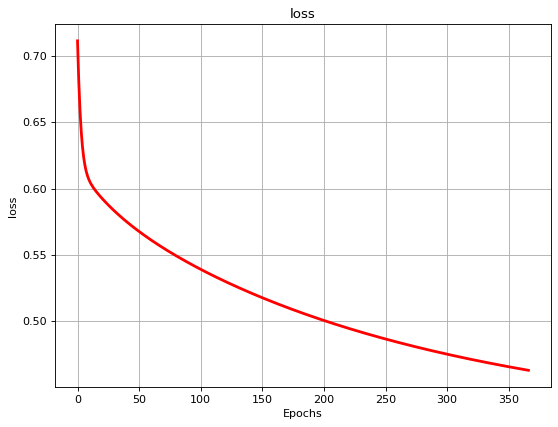

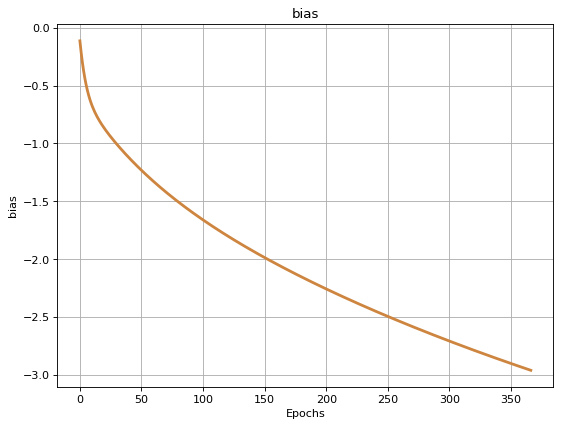

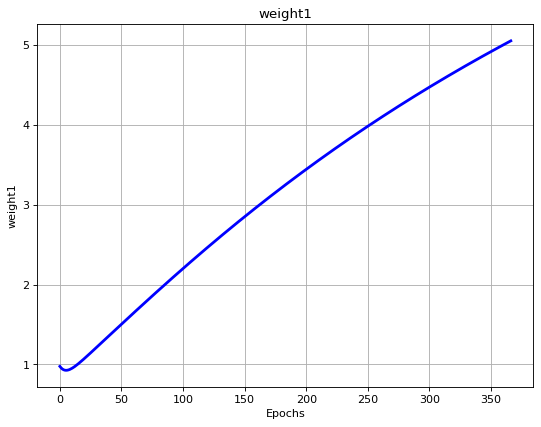

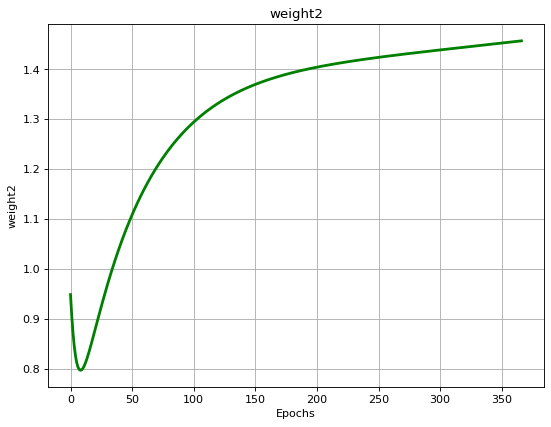

In [342]:
customModel = myNeuralNetwork()
customModel.fit(X_train_scaled, y_train, epochs=8000, loss_thresold=0.4631)
customModel.plot_grap()

# Stochastic Gradient Descent vs Batch Gradient Descent vs Mini Batch Gradient Descent

In [259]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import random
sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()

df=pd.read_csv('/content/home_price_area_bed.csv')
df.head(2)

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00


In [200]:
scaled_x=sx.fit_transform(df.drop('price',axis='columns'))
scaled_y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1)).reshape(df.shape[0])
scaled_x[2]

array([0.22068966, 0.5       ])

In [319]:
class GradiendMiniStochastic:
  def __init__(self,train_x,train_y,batch_type,epochs,learning_rate,batch_size):
    self.batch_type=batch_type
    self.batch_size=batch_size
    self.epochs=epochs
    self.learning_rate=learning_rate
    self.train_x=train_x
    self.train_y=train_y
    self.scaled_x=None
    self.scaled_y=None
    self.weight=None 
    self.bias=0
    self.y_predicted=None
    self.sx=preprocessing.MinMaxScaler()
    self.sy=preprocessing.MinMaxScaler()
    self.scale_raw_data()
    self.epochs_step=[]
    self.cost_values=[]

  def plot_data(self):
    color_list=['blue','green','red','cyan','magenta','orchid','purple','peru']
    random_nr=random.randint(0,len(color_list)-1)
    plt.figure(figsize=(8, 6), dpi=80)
    plt.plot(self.epochs_step, self.cost_values, linewidth='2.5',color=color_list[random_nr])
    plt.grid(True)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    header=['Stochastic Gradient Descent' if self.batch_type=='stochastic' else 'Batch Gradient Descent' if self.batch_type=='gradient' else 'Mini Batch Gradient Descent' ][0]
    plt.title(header)
    plt.show()

  def scale_raw_data(self):
    self.scaled_x=self.sx.fit_transform(self.train_x.drop('price',axis='columns'))
    self.scaled_y=self.sy.fit_transform(df['price'].values.reshape(df.shape[0],1)).reshape(df.shape[0])
    self.weight=np.ones(shape=(self.scaled_x.shape[1]))

  def calculate_prediction(self,weight, x_train, bias):
    return np.dot(weight,x_train.T)+bias


  def derivation_of_bias(self,x_train,y_train,y_predicted):
    return -(2/len(x_train))*np.sum(y_train-y_predicted)


  def derivation_of_weight(self,x_train,y_train,y_predicted):
    return -(2/len(x_train))*(x_train.T.dot(y_train-y_predicted))


  def cost_function_mean_squared_error_numpy(self,y_true, y_predicted):
    return np.mean(np.square(y_true-y_predicted))


  def randomize_selected_data(self,x_train,y_true):
    random_number = np.random.permutation(len(x_train))
    return x_train[random_number],y_true[random_number]

  def derivative_calculation(self,weight,x_train,bias,y_train,learning_rate):
    y_predicted=calculate_prediction(weight,x_train,bias)
    w_derivative = self.derivation_of_weight(x_train,y_train, y_predicted)
    b_derivative = self.derivation_of_bias(x_train,y_train, y_predicted)
    weight = weight - learning_rate * w_derivative
    bias = bias - learning_rate *b_derivative
    return y_predicted,weight,bias

  def predict(self,input_val):
    prediction=np.dot(self.weight,self.sx.transform(input_val)[0].T)+self.bias
    return self.sy.inverse_transform([[prediction]])[0][0]


  def grad_descent(self,x_train, y_train, weight,bias,learning_rate, epochs):
    self.cost_values=[]
    self.epochs_step=[]
    for epoch in range(epochs):
        self.y_predicted,self.weight,self.bias=self.derivative_calculation(self.weight,x_train,self.bias,y_train,learning_rate)
        
        if epoch%5==0:
          cost= self.cost_function_mean_squared_error_numpy(y_train,self.y_predicted)
          self.cost_values.append(cost)
          self.epochs_step.append(epoch)

  def mini_batch_gradient_descent(self,x_train, y_train, weight,bias,learning_rate, batch_size,total_samples,epochs):
    self.cost_values=[]
    self.epochs_step=[]

    for epoch in range(epochs):
      for batch in range(0,total_samples,batch_size):
        x_train_batch=x_train[batch:batch+batch_size]
        y_train_batch=y_train[batch:batch+batch_size]
        self.y_predicted,self.weight,self.bias=self.derivative_calculation(self.weight,x_train_batch,self.bias,y_train_batch,learning_rate)
      if epoch%5==0:
          cost= self.cost_function_mean_squared_error_numpy(y_train_batch,self.y_predicted)
          self.cost_values.append(cost)
          self.epochs_step.append(epoch)


  def stochastic_gradient_descent(self,x_train, y_train, weight,bias, learning_rate, epochs,total_samples):
    self.cost_values=[]
    self.epochs_step=[]
    
    for epoch in range(epochs):
      random_index=random.randint(0,total_samples-1)

      x_train_random_selected=x_train[random_index]
      y_train_random_selected=y_train[random_index]
      self.y_predicted,self.weight,self.bias=self.derivative_calculation(self.weight,x_train_random_selected,self.bias,y_train_random_selected,learning_rate)
      if epoch%5==0:
        cost= self.cost_function_mean_squared_error_numpy(y_train_random_selected,self.y_predicted)
        self.cost_values.append(cost)
        self.epochs_step.append(epoch)
    #return weight, bias, cost_values,epochs_step

  def calculate_gradient_descent(self):
   
    bias = 0
    total_samples = self.scaled_x.shape[0]
    self.cost_values=[]
    self.epochs_step=[]

    if self.batch_size>total_samples:
      self.batch_size=total_samples
    
    if self.batch_type=='gradient':
      return self.grad_descent(self.scaled_x, self.scaled_y, self.weight,self.bias,self.learning_rate,self.epochs)
    elif self.batch_type=='mini':
      return self.mini_batch_gradient_descent(self.scaled_x, self.scaled_y, self.weight,bias,self.learning_rate, self.batch_size,total_samples,self.epochs)
    elif self.batch_type=='stochastic':
      return self.stochastic_gradient_descent(self.scaled_x, self.scaled_y,self.weight,self.bias,self.learning_rate,self.epochs,total_samples)

  

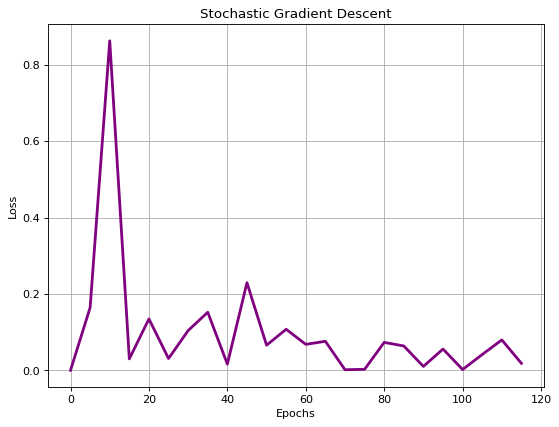

154.3611415492936


In [311]:
classobj=GradiendMiniStochastic(df,df,'stochastic',120,0.01,5)
classobj.calculate_gradient_descent()
pred=classobj.predict(np.array([[2600,4]]))
classobj.plot_data()
print(pred)

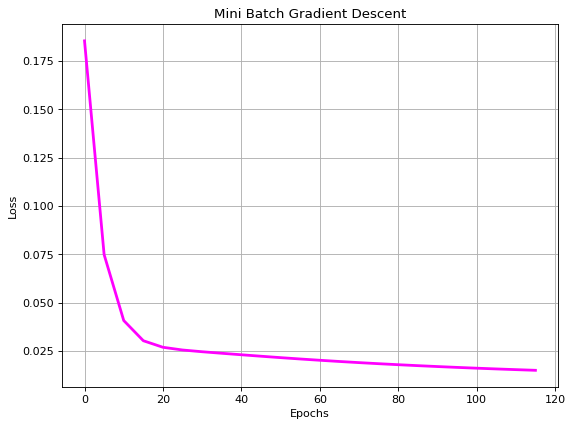

128.6660933624195


In [316]:
classobj=GradiendMiniStochastic(df,df,'mini',120,0.01,5)
classobj.calculate_gradient_descent()
pred=classobj.predict(np.array([[2600,4]]))
classobj.plot_data()
print(pred)

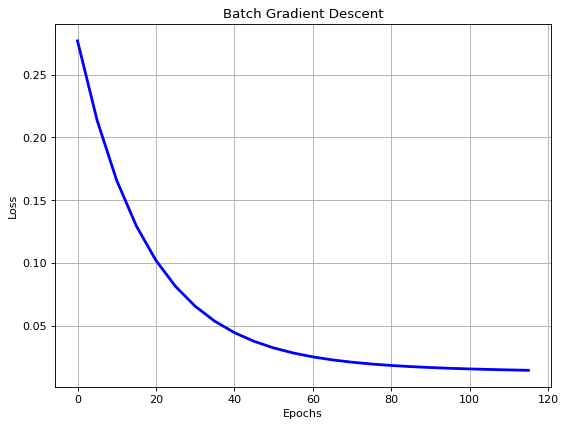

137.1406638384148


In [320]:
classobj=GradiendMiniStochastic(df,df,'gradient',120,0.01,5)
classobj.calculate_gradient_descent()
pred=classobj.predict(np.array([[2600,4]]))
classobj.plot_data()
print(pred)

# 